In [1]:
import pandas as pd
import numpy as np

In [2]:
cellc = pd.read_csv("/data/Genetic/tab_data/EstimateCellCounts_PPMI_EPICn524final030618.csv")
pat_stat = pd.read_csv("/data/Genetic/tab_data/Patient_Status.csv")
pat_info = pd.read_csv("/data/Genetic/tab_data/PPMI_Meth_n524_for_LONI030718.tsv", delimiter='\t')
raw_dat = pd.read_csv("/data/Genetic/tab_data/beta_post_Funnorm_PPMI_EPICn524final030618.csv")

In [3]:
pat_numbers = list(pat_info["PATNO"].astype(int))

In [4]:
is_PD = lambda id: pat_stat[pat_stat.PATNO == id]["RECRUITMENT_CAT"].values[0] == 'PD'
get_sentrix = lambda id: str(pat_info[pat_info.PATNO == id]["Sentrix ID"].values[0]) + "_" + pat_info[pat_info.PATNO == id]["Sentrix Position"].values[0]
getXVal_cellc = lambda id: cellc[cellc.Sentrix_position == get_sentrix(id)].values[0][1:].astype(float)
getXVal_raw = lambda id: raw_dat[get_sentrix(id)].values

In [5]:
X = np.zeros((len(pat_numbers), 864067))
y = np.zeros((len(pat_numbers)), dtype=int)

In [6]:
for i, number in enumerate(pat_numbers):
    if(is_PD(number)):
        y[i] = 1
    X[i] = getXVal_raw(number)
raw_dat = None
import gc
gc.collect()

7

In [7]:
X.shape, y.shape

((524, 864067), (524,))

In [8]:
y.sum()

389

In [9]:
from sklearn.decomposition import PCA as pca
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split as splt
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import matthews_corrcoef as mcc

forest = rfc(n_estimators = 1000, n_jobs = -1)
decomp = pca(n_components=32, svd_solver='full')
X_tr, X_ts, y_tr, y_ts = splt(X, y, test_size = 0.2, random_state = 42, stratify = y)
decomp.fit(X_tr)
X_tr_decomp = decomp.transform(X_tr)
X_ts_decomp = decomp.transform(X_ts)
forest.fit(X_tr_decomp, y_tr)
y_ts_pred = forest.predict(X_ts_decomp)

In [10]:
acc(y_ts, y_ts_pred), mcc(y_ts, y_ts_pred)

(0.7333333333333333, -0.057692307692307696)

In [11]:
decomp2 = pca(n_components=2, svd_solver='full')

In [12]:
decomp2.fit(X_tr)
X_decomp = decomp2.transform(X)
y

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,

In [13]:
x1 = []
x0 = []
for i, x in enumerate(X_decomp):
    if y[i] == 1:
        x1.append(x)
    else:
        x0.append(x)
x1 = np.array(x1)
x0 = np.array(x0)

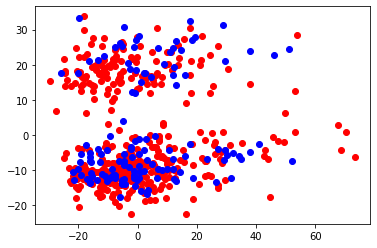

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x1[:,0], x1[:,1], 'ro')
plt.plot(x0[:,0], x0[:,1], 'bo')
plt.show()

In [15]:
X.shape

(524, 864067)

In [16]:
X_stats = np.array([np.std(X, axis=0), np.mean(X, axis=0), np.ptp(X, axis=0)])

In [17]:
X_stats.shape

(3, 864067)

In [18]:
mat = [[0,0],[0,0]]
for i in range(len(y_ts)):
    mat[y_ts[i]][y_ts_pred[i]] += 1

In [24]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
mat

[[0, 27], [1, 77]]

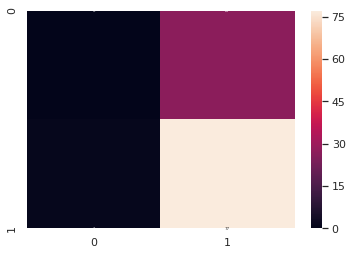

In [25]:
df_cm = pd.DataFrame(mat, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 4}) # font size

plt.show()